In [82]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import math
%matplotlib inline

In [83]:
df_baseline = pd.read_csv('baseline/summary.csv')
df_rewrite = pd.read_csv('rewrite/summary.csv')
keys = [
    'lut_used',
    'bram_used',
    'dsp_used',
    'reg_used',
    'lutmem_used',
    'uram_used'
]

In [84]:
df_baseline

,status,bench,uram_used,lut_used,dsp_used,bram_used,lutmem_used,reg_used
0,ok,bfs-queue-fix:machsuite-bfs-queue,0,2717,0,3,136,4514
1,ok,no-dir:machsuite-fft-strided,0,4291,38,2,437,8376
2,ok,no-dir:machsuite-aes,0,14603,0,2,564,17513
3,ok,no-dir:machsuite-kmp,0,2164,0,1,115,3583
4,ok,no-dir:machsuite-nw,0,3970,0,1,122,6037
5,ok,no-dir:machsuite-md-grid,0,11106,41,8,532,19492
6,ok,no-dir:machsuite-spmv-ellpack,0,5687,11,2,226,9134
7,ok,no-dir:machsuite-stencil-stencil3d,0,3303,6,1,375,5008
8,ok,no-dir:machsuite-md-knn,0,29746,33,2,539,42472
9,ok,bfs-bulk-fix:machsuite-bfs-bulk,0,2376,0,2,133,4518


In [85]:
df_baseline['type'] = 'baseline'
df_rewrite['type'] = 'rewrite'
df = pd.concat([df_baseline, df_rewrite], ignore_index=True, sort=False)

In [86]:
df['bench'] = df['bench'].apply(lambda row: row.split(':')[1].replace('machsuite-', ''))
df = df[df['status'] != 'error']
for key in keys:
    df[key] = pd.to_numeric(df[key], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 0 to 27
Data columns (total 9 columns):
status         27 non-null object
bench          27 non-null object
uram_used      27 non-null int64
lut_used       27 non-null int64
dsp_used       27 non-null int64
bram_used      27 non-null int64
lutmem_used    27 non-null int64
reg_used       27 non-null int64
type           27 non-null object
dtypes: int64(6), object(3)
memory usage: 2.1+ KB


In [87]:
df

,status,bench,uram_used,lut_used,dsp_used,bram_used,lutmem_used,reg_used,type
0,ok,bfs-queue,0,2717,0,3,136,4514,baseline
1,ok,fft-strided,0,4291,38,2,437,8376,baseline
2,ok,aes,0,14603,0,2,564,17513,baseline
3,ok,kmp,0,2164,0,1,115,3583,baseline
4,ok,nw,0,3970,0,1,122,6037,baseline
5,ok,md-grid,0,11106,41,8,532,19492,baseline
6,ok,spmv-ellpack,0,5687,11,2,226,9134,baseline
7,ok,stencil-stencil3d,0,3303,6,1,375,5008,baseline
8,ok,md-knn,0,29746,33,2,539,42472,baseline
9,ok,bfs-bulk,0,2376,0,2,133,4518,baseline


<Figure size 432x288 with 0 Axes>

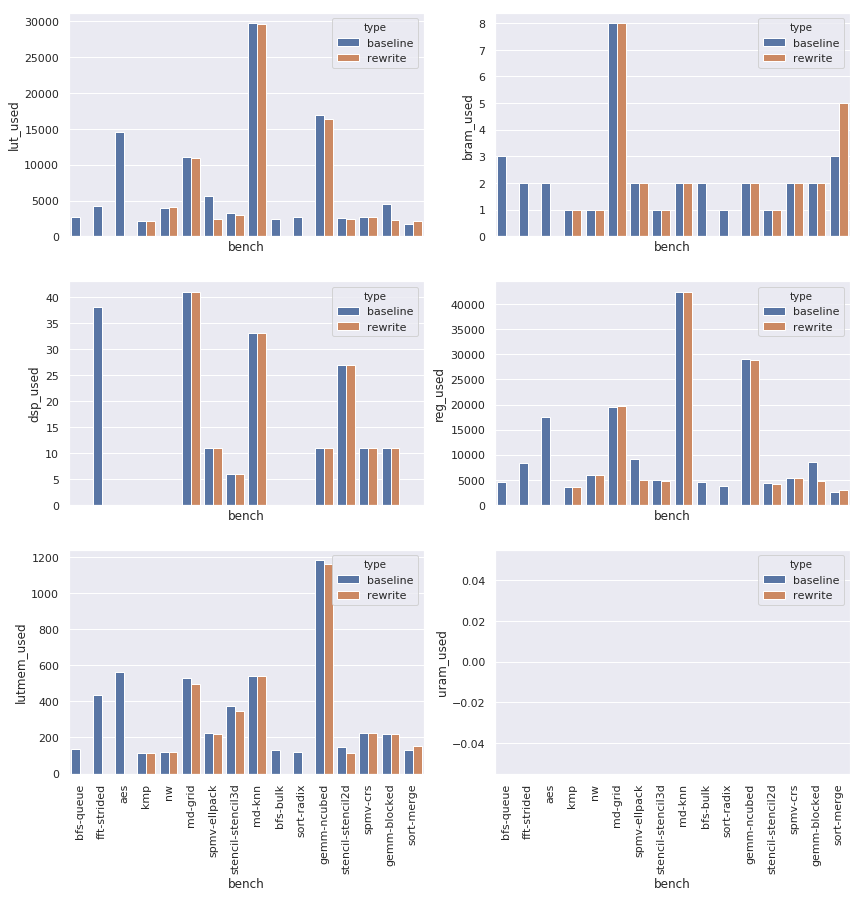

In [88]:
plt.figure()
sns.set()

# Configuration for subplot
cols = 2
rows = int(math.ceil(len(keys) / cols))

fig, axes = plt.subplots(rows, cols, figsize=(14, 14), sharex=True)

for idx, key in enumerate(keys):
    # Get current axes for the subplot
    ax = axes[int(idx / cols), idx % cols]
    print()
    sns.barplot(x='bench', y=key, hue='type', data=df, ax=ax)
    ax.tick_params(labelrotation=90, axis='x')
    
fig.suptitle('Machsuite Benchmark (Absolute)', y=0.07)

In [89]:
fig.savefig('absolute.png', dpi=300)